In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import cluster
import matplotlib.pyplot as plt
from scipy.spatial import distance
from mpl_toolkits.mplot3d import Axes3D
pd.options.display.max_rows = 4000

In [2]:
data = pd.read_csv("data/data_for_analysis.csv")
# Remove sign
data['IntensityMeanAbsVelocity'] = np.abs(data['IntensityMeanAbsVelocity'])

In [3]:
data.head()

,author_last_name,author_first_name,birth_year,spoken_word,cave_canem_indicator,region,city_of_birth,state,country,childhood_note,...,PauseRate,PauseDutyCycle,MeanPauseDuration,ComplexityAllPauses,ComplexitySyllables,ComplexityPhrases,IntensitySegmentMeanSD,IntensityMeanAbsVelocity,IntensityMeanAbsAccel,poet_full_name
0,Adams,Samantha,1996,False,False,Midwest,NaN,Wisconsin,NaN,NaN,...,1.346801,0.487093,0.361667,9.739216,15.261978,4.193274,13.801149,149.186800,120.134374,Adams Samantha
1,Adams,Samantha,1996,False,False,Midwest,NaN,Wisconsin,NaN,NaN,...,0.826322,0.400841,0.485091,6.404722,14.183274,3.091935,14.306229,159.312214,132.202711,Adams Samantha
2,Adisa,Opal Palmer,1954,False,True,Caribbean,Kingston,NaN,Jamaica,came to US at age 15 and attended high school ...,...,0.607203,0.268844,0.442759,5.259354,12.131653,2.768081,3.458940,191.883661,196.840812,Adisa Opal Palmer
3,Adisa,Opal Palmer,1954,False,True,Caribbean,Kingston,NaN,Jamaica,came to US at age 15 and attended high school ...,...,0.921430,0.281922,0.305962,6.968303,13.079815,2.672056,4.096043,277.537265,305.414392,Adisa Opal Palmer
4,Alexander,Elizabeth,1962,False,True,Northeast,Harlem,New York,USA,"grew up in Washington, D.C.",...,0.692450,0.252505,0.364654,5.517232,13.599243,2.288253,3.513307,205.459264,210.177286,Alexander Elizabeth


In [4]:
data.columns

Index(['author_last_name', 'author_first_name', 'birth_year', 'spoken_word',
       'cave_canem_indicator', 'region', 'city_of_birth', 'state', 'country',
       'childhood_note', 'undergrad_study_indicator',
       'graduate_study_indicator', 'iowa_mfa?', 'public_private_indicator',
       'Ivy', 'hbcu', 'year_of_recording', 'recording', 'source_of_recording',
       'cave_canem_indicator.1', 'poet_laureate', 'major_award', 'venue_type',
       'slam_(1)_or_not_(0)?', 'venue', 'poem_title', 'urls', 'f0Mean',
       'Dynamism', 'f0Range2sd', 'f0Entropy', 'f0MeanAbsVelocity',
       'f0MeanAbsAccel', 'PauseCount', 'PauseRate', 'PauseDutyCycle',
       'MeanPauseDuration', 'ComplexityAllPauses', 'ComplexitySyllables',
       'ComplexityPhrases', 'IntensitySegmentMeanSD',
       'IntensityMeanAbsVelocity', 'IntensityMeanAbsAccel', 'poet_full_name'],
      dtype='object')

In [5]:
measurement_columns = data.columns[28:-1]
measurement_columns

Index(['Dynamism', 'f0Range2sd', 'f0Entropy', 'f0MeanAbsVelocity',
       'f0MeanAbsAccel', 'PauseCount', 'PauseRate', 'PauseDutyCycle',
       'MeanPauseDuration', 'ComplexityAllPauses', 'ComplexitySyllables',
       'ComplexityPhrases', 'IntensitySegmentMeanSD',
       'IntensityMeanAbsVelocity', 'IntensityMeanAbsAccel'],
      dtype='object')

This is just the histogram of the raw measurements. I am just trying to literally look at the data to see if there is anything interesting going on.

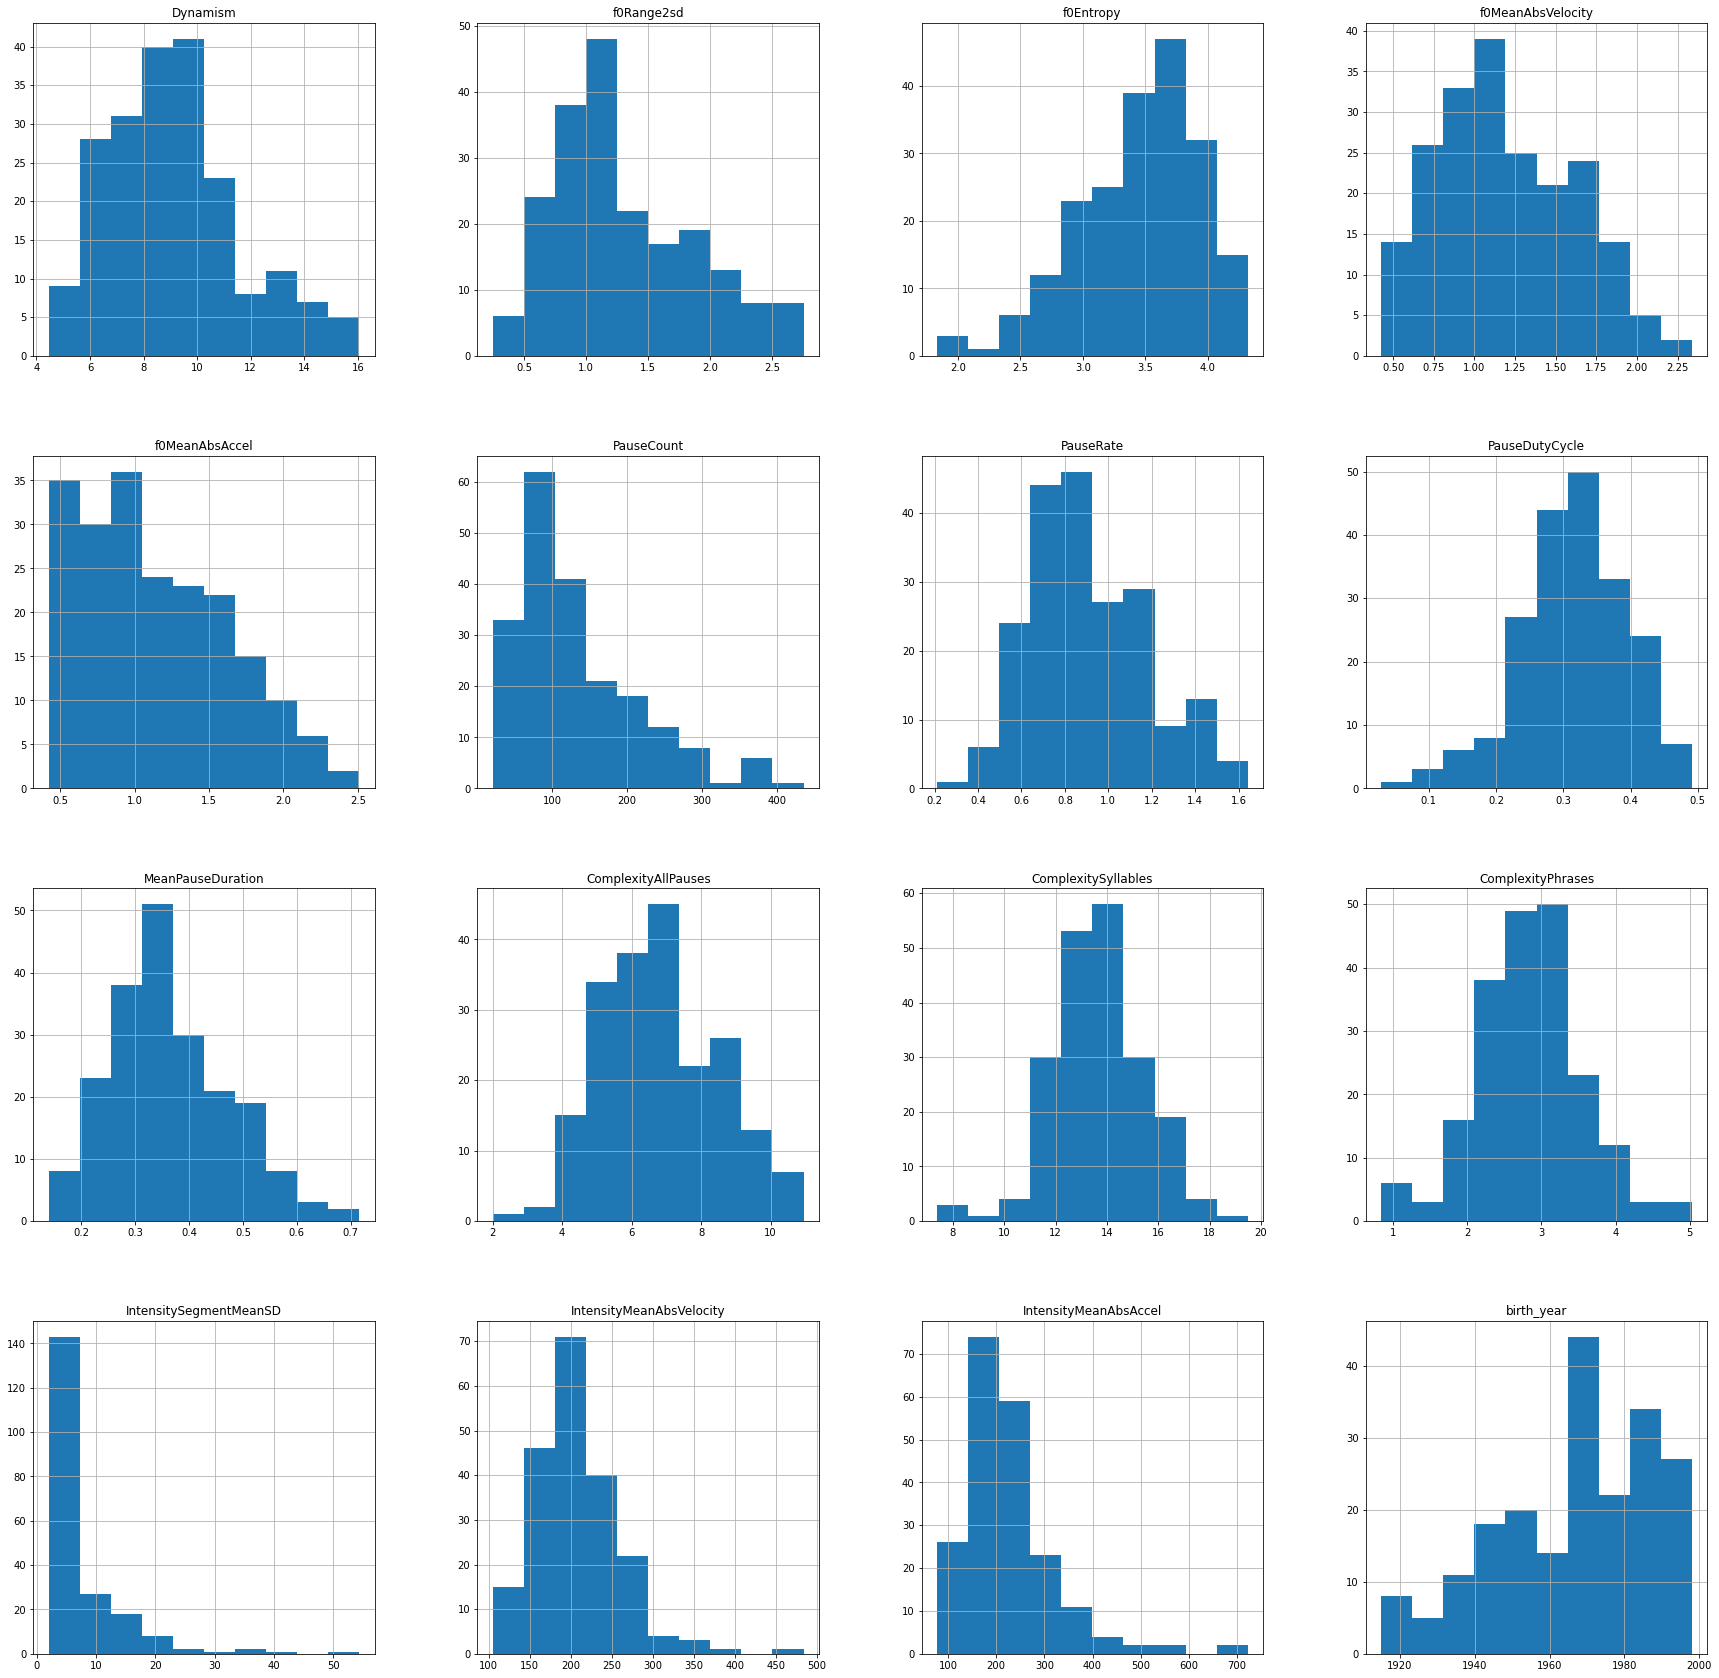

In [6]:
data[measurement_columns.to_list() + ["birth_year"]].hist(figsize=(30, 30));

The following matrix scatter plot is to see the relationship between measurements. 
<font color='blue'>Three measurements pairs appear to have strong correlation. They are "PauseRate" & "ComplexityAllPauses", dyanmism & "f0Range2sd", and "IntesnsityMeanAbsVelocity" & "IntesnsityMeanAbsAccel".</font> The first pair is almost perfectly correlated, so in the future, consider only keep one of them.

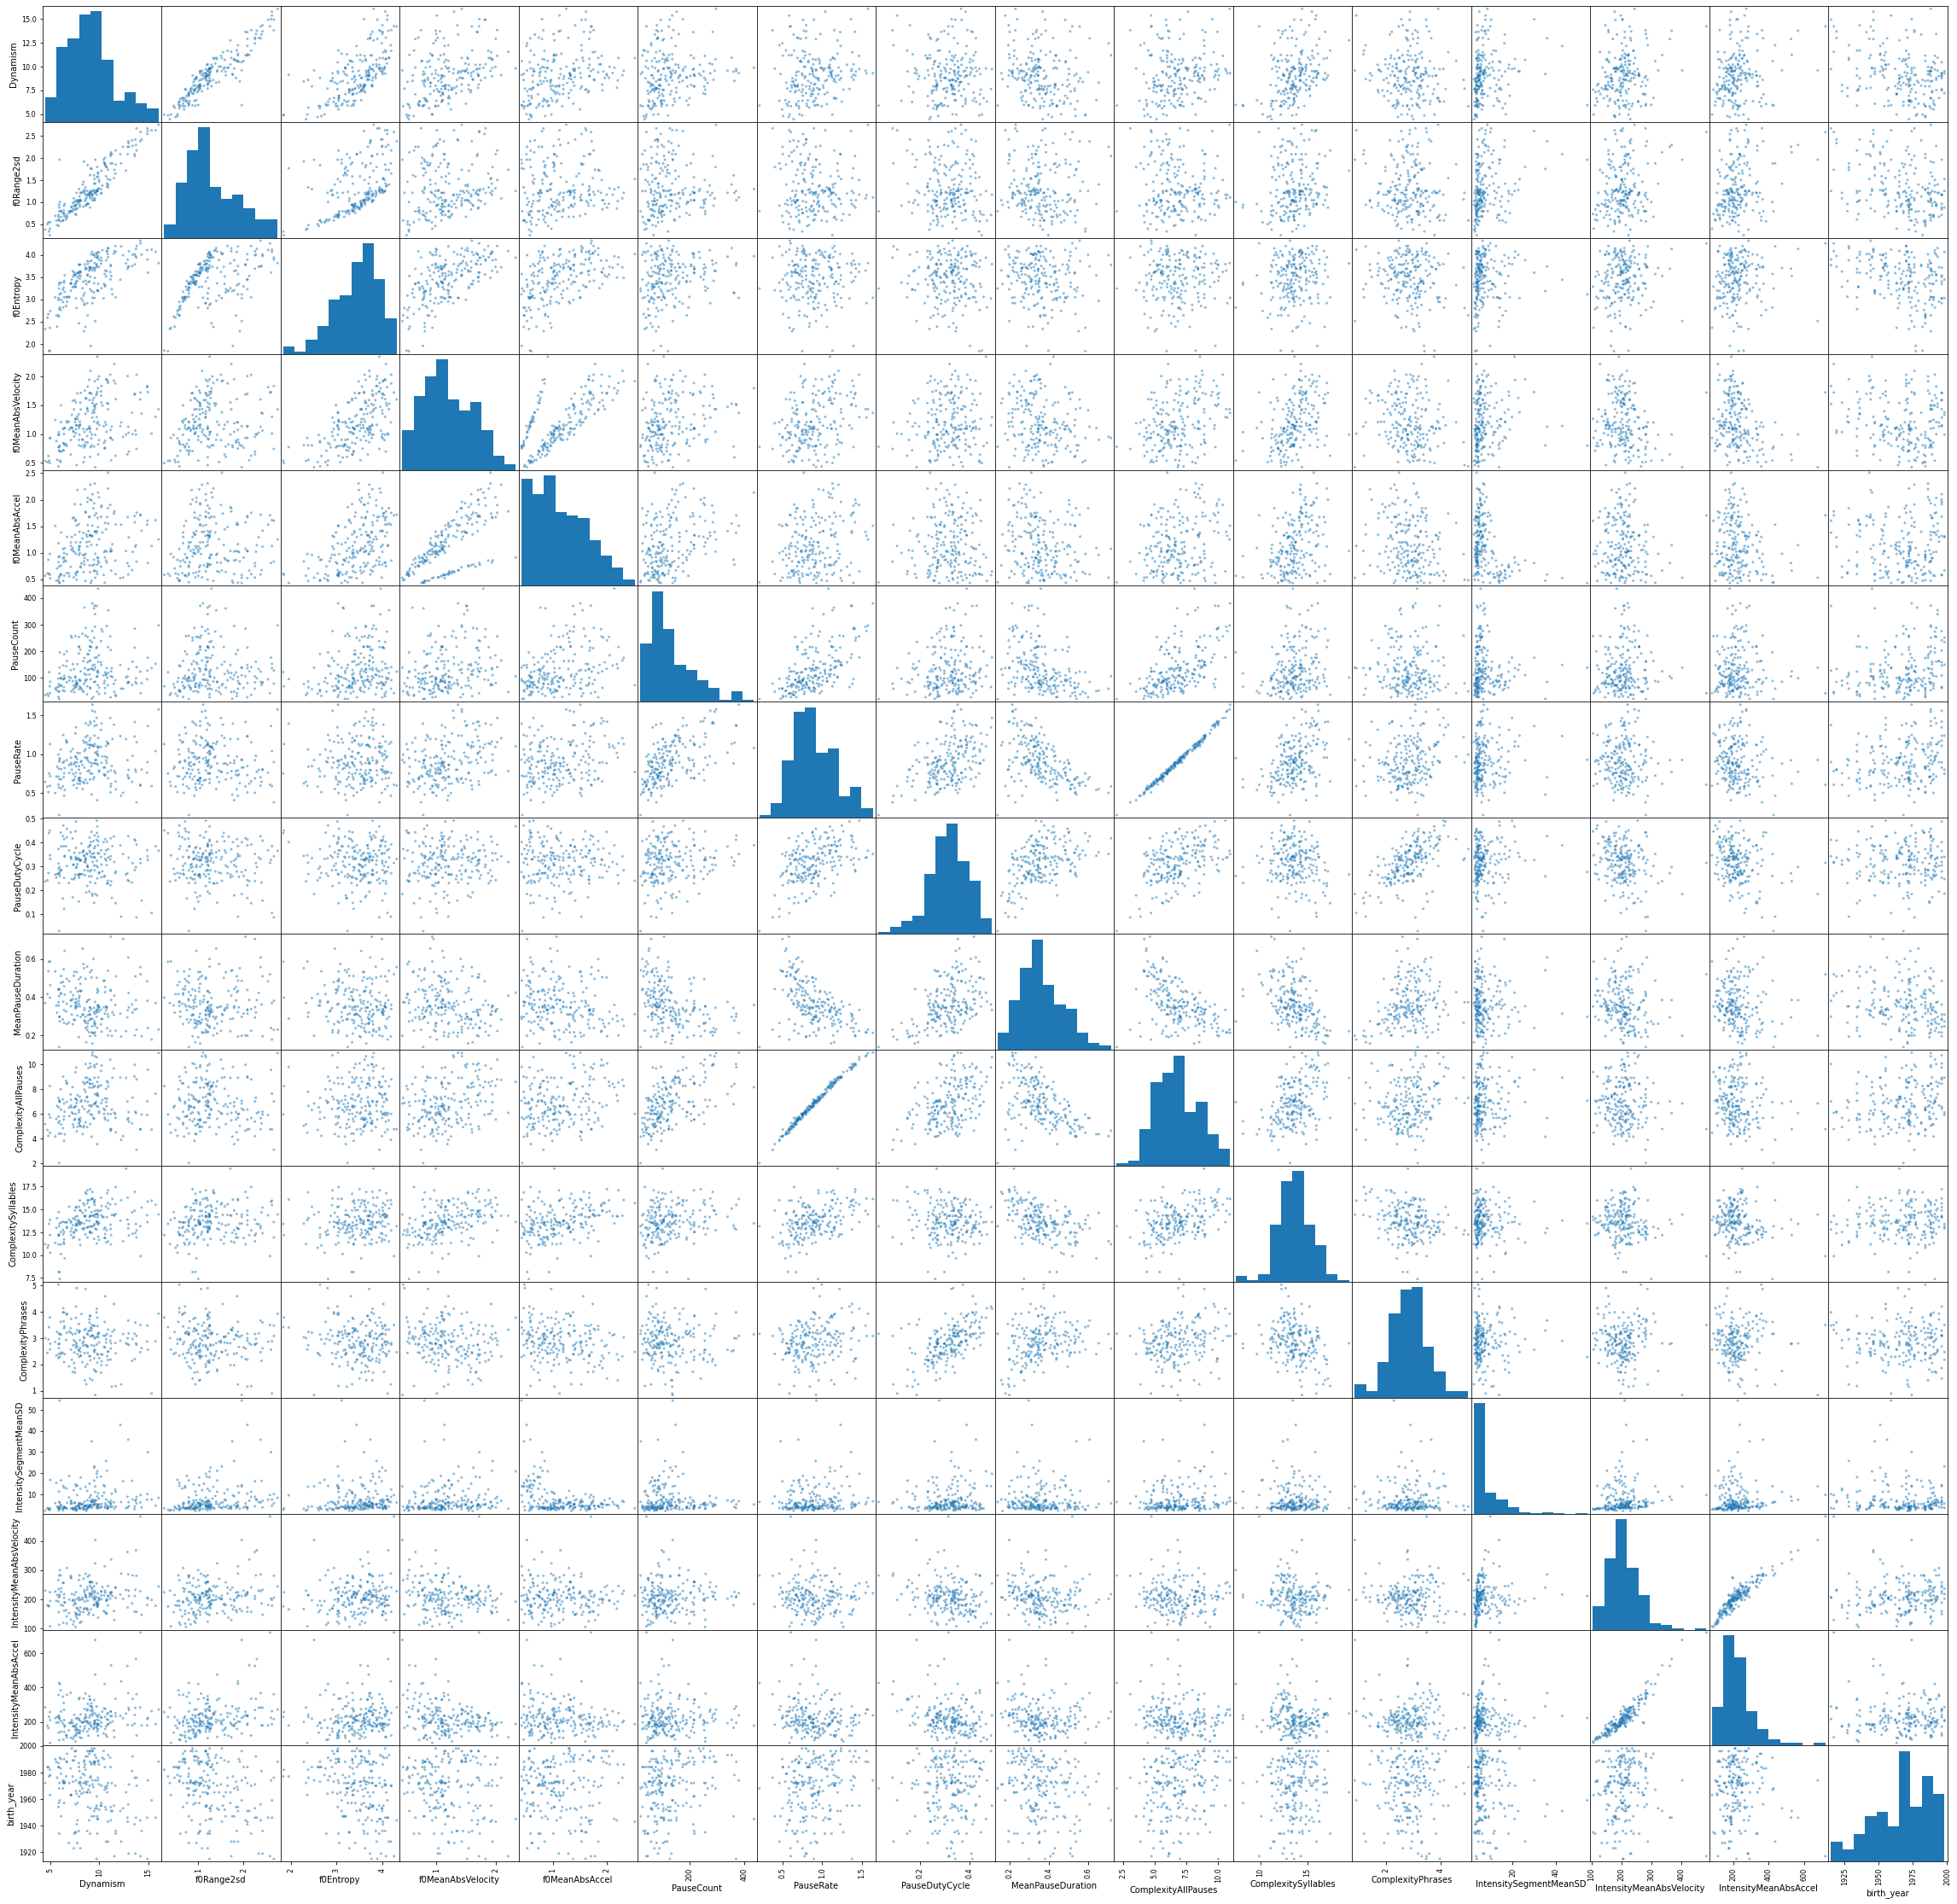

In [7]:
pd.plotting.scatter_matrix(frame=data[measurement_columns.to_list() + ["birth_year"]], figsize=(40, 40));

<font color='blue'>We drop "PauseRate", "f0Range2sd", 'IntensityMeanAbsAccel' from now on in this exploratory analysis.</font> 

In [8]:
# We drop "PauseRate", "f0Range2sd", 'IntensityMeanAbsAccel' from now on in this exploratory analysis.
measurement_columns = measurement_columns.drop(["PauseRate", "f0Range2sd", 'IntensityMeanAbsAccel'])

In [9]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

<font color='blue'>When we plot'f0MeanAbsAccel' against 'f0MeanAbsVelocity', we see that recordings "naturally" fall into two groups as points can be seperated by an imaginary line. </font> We refer the points below the dashed line as lower group. Recordings in the lower group has smaller 'f0MeanAbsAccel' relative to 'f0MeanAbsVelocity'.

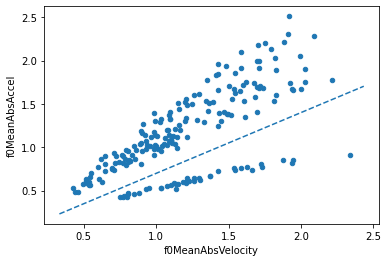

In [10]:
# 'f0MeanAbsVelocity', 'f0MeanAbsAccel' can again seperate data into two groups.
data.plot.scatter(x='f0MeanAbsVelocity', y='f0MeanAbsAccel');
abline(0.7, 0)

In [11]:
lower_group_boolean = data['f0MeanAbsAccel'] < data['f0MeanAbsVelocity']*0.7

<font color='blue'> Recordings in the lower group. </font>

In [12]:
data[["author_last_name", "author_first_name", "poem_title"]].loc[lower_group_boolean]

,author_last_name,author_first_name,poem_title
0,Adams,Samantha,Eartha Lifts her Slip
1,Adams,Samantha,Three Mothers of Gynecology Pry open J Marion ...
8,Angelou,Maya,NaN
13,Bingham-Risher,Remica L.,The Body Speaks
22,Christina,Dominique,Mothers of Murdered Sons
25,Clarke,Cheryl,Brief Interval
26,Clarke,Cheryl,Bulletin
31,Cortez,Jayne,Rape
38,Diggs,LaTasha N. Nevada,The Originator
39,Diggs,LaTasha N. Nevada,Damn Right It's Betta than Yours


<font color='blue'> Recordings in the upper group. </font>

In [13]:
data[["author_last_name", "author_first_name", "poem_title"]].loc[~lower_group_boolean]

,author_last_name,author_first_name,poem_title
2,Adisa,Opal Palmer,This Poem Is An Invitation_Wobj.mat
3,Adisa,Opal Palmer,Public Restrooms Prelude_Wobj.mat
4,Alexander,Elizabeth,Venus Hottentot_Wobj.mat
5,Alexander,Elizabeth,Praise Song for the Day_Wobj.mat
6,Angelou,Maya,Still I Rise_Wobj.mat
7,Angelou,Maya,Phenomenal Woman_Wobj.mat
9,Barnes,Aziza,My Dad Asks _How Come Black Folk Can_t Just Wr...
10,Barnes,Aziza,Aunt Jemima_Wobj.mat
11,Betts,Tara,Erasure_Wobj.mat
12,Betts,Tara,Switch_Wobj.mat


The following boxplot compare the prosodic measurements of upper and lower group. 
<font color='blue'> One noticible difference here is that the lower group has much higher "IntensitySegmentMeanSD". </font>

Dynamism
f0Entropy
f0MeanAbsVelocity
f0MeanAbsAccel
PauseCount
PauseDutyCycle
MeanPauseDuration
ComplexityAllPauses
ComplexitySyllables
ComplexityPhrases
IntensitySegmentMeanSD
IntensityMeanAbsVelocity


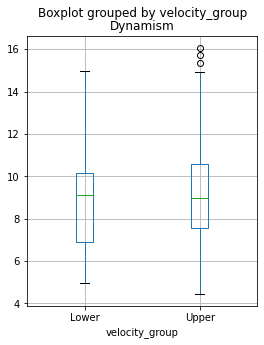

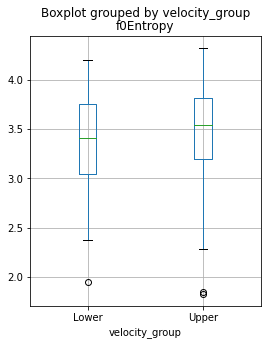

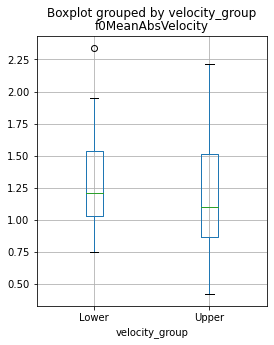

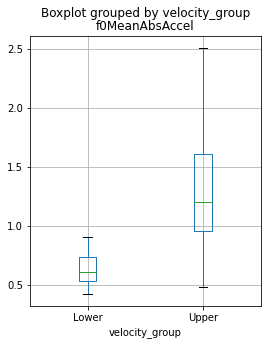

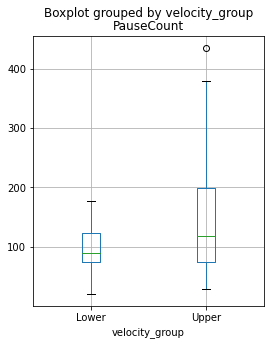

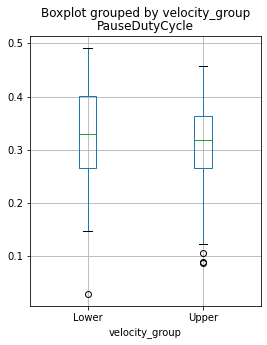

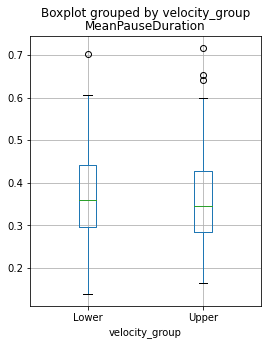

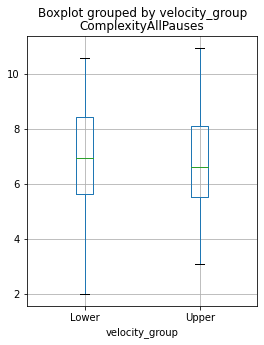

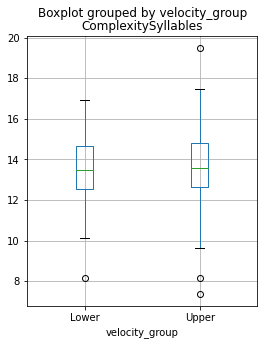

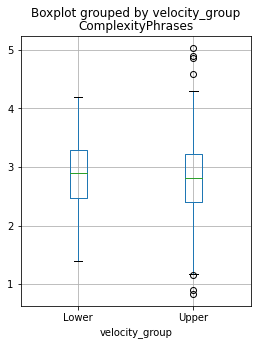

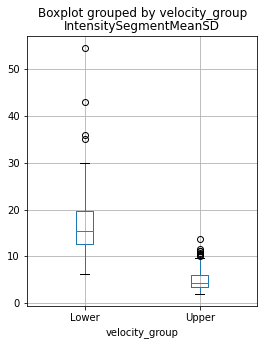

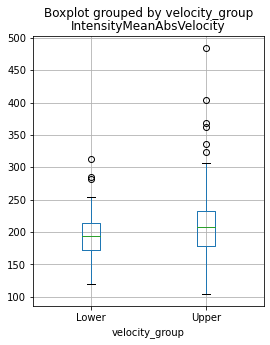

In [14]:
data["velocity_group"] = np.repeat("Upper", data.shape[0])
data.loc[lower_group_boolean, "velocity_group"] = "Lower"
for column in measurement_columns:
    print(column)
    data.boxplot(column=column, by="velocity_group", figsize=(4, 5));

<font color='blue'> 
Two groups have every different venue types and "slam".</font>

In [15]:
# categorical_feature_list = ['spoken_word', 'cave_canem', 'region', 'undergraduate_school', 'graduate_school',
#        'iowa_mfa?', 'private_school', 'ivy', 'hbcu', 'audience', 'poet_laureate',
#        'major_award','recording', "venue_type", 'slam_(1)_or_not_(0)?']
categorical_feature_list = ['recording', "venue_type", 'slam_(1)_or_not_(0)?']

In [16]:
data.columns

Index(['author_last_name', 'author_first_name', 'birth_year', 'spoken_word',
       'cave_canem_indicator', 'region', 'city_of_birth', 'state', 'country',
       'childhood_note', 'undergrad_study_indicator',
       'graduate_study_indicator', 'iowa_mfa?', 'public_private_indicator',
       'Ivy', 'hbcu', 'year_of_recording', 'recording', 'source_of_recording',
       'cave_canem_indicator.1', 'poet_laureate', 'major_award', 'venue_type',
       'slam_(1)_or_not_(0)?', 'venue', 'poem_title', 'urls', 'f0Mean',
       'Dynamism', 'f0Range2sd', 'f0Entropy', 'f0MeanAbsVelocity',
       'f0MeanAbsAccel', 'PauseCount', 'PauseRate', 'PauseDutyCycle',
       'MeanPauseDuration', 'ComplexityAllPauses', 'ComplexitySyllables',
       'ComplexityPhrases', 'IntensitySegmentMeanSD',
       'IntensityMeanAbsVelocity', 'IntensityMeanAbsAccel', 'poet_full_name',
       'velocity_group'],
      dtype='object')

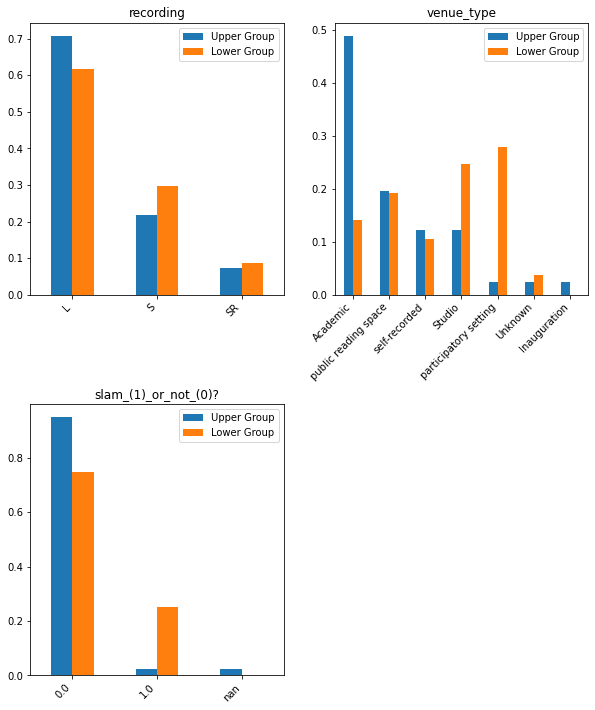

In [17]:
fig = plt.figure(figsize=(10, 12))
fig.subplots_adjust(hspace=0.4)
plot_block = np.int(np.ceil(np.sqrt(len(categorical_feature_list))))
for num, column_name in enumerate(categorical_feature_list):
    column_dict = {}
    for hotzone_boolean, series in data.groupby("velocity_group")[column_name]:
        column_dict[hotzone_boolean] = series.value_counts(dropna=False, normalize=True)
    ax = fig.add_subplot(plot_block, plot_block, num+1)
    pd.concat(column_dict, axis=1).plot.bar(ax=ax)
    plt.xticks(rotation=45, ha="right")
    ax.set_title(column_name)
    ax.legend(["Upper Group", "Lower Group"])

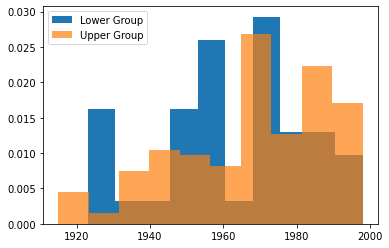

In [18]:
plt.hist(data.loc[lower_group_boolean, "birth_year"], label="Lower Group", density=True);
plt.hist(data.loc[~lower_group_boolean, "birth_year"], label="Upper Group", density=True, alpha=0.7);
plt.legend();

# Compare Recordings from Same Poets
Here is how we compute the distance between two recordings $R_1 = (2.3, 0.2)$ and $R_2 = (1, 0.1)$. $dist(R_1, R_2) = | |2.3 - 1| + | 0.2 - 0.1 | | = | 1.3 + 0.1| = 1.4$ The distance function is called L1-distance also known as Manhattan Distance . The measurements we used to compute the distance are 'f0Mean', 'f0MeanAbsVelocity', 'Dynamism Original Formula', 'MeanPauseDuration' and 'IntensitySegmentMeanSD'.

## Scale Each Dimension
We scale the data before computing the distance because different prosodic measurements can have a highly varying magnitude. E.g. 'IntensityMeanAbsAccel' often has values such as 200, whereas, 'PauseRate' has a value around 1. Scaling brings all measurements to the same scale so that no single measurement will dominate the distance because of its large magnitude. 

In [19]:
# colmean_list = data[measurement_columns].mean()
# sd_list = data[measurement_columns].std()

In [20]:
distance_measurement_columns = ['f0Mean', 'f0MeanAbsVelocity', 'Dynamism', 'MeanPauseDuration',
                               'IntensitySegmentMeanSD']
colmean_list = data[distance_measurement_columns].mean()
sd_list = data[distance_measurement_columns].std()

In [21]:
distance_list = []
difference_series_list = []
birth_year_list = []
name_list = []
for name, dt in data.groupby(data.columns[:2].to_list()):
    if dt.shape[0] == 2:
        birth_year_list.append(dt["birth_year"].iloc[0])
        dt = dt[distance_measurement_columns]
        dt = (dt - colmean_list) / sd_list
        name_list.append(name)
        difference_series_list.append(np.abs(dt.iloc[0, :] - dt.iloc[1, :]))
        distance_list.append(distance.euclidean(dt.iloc[0, :], dt.iloc[1, :]))

In [22]:
difference_dt = pd.DataFrame(difference_series_list, index=name_list)
difference_dt["distance"] = distance_list
difference_dt["birth_year"] = birth_year_list

In [23]:
difference_dt.head()

,f0Mean,f0MeanAbsVelocity,Dynamism,MeanPauseDuration,IntensitySegmentMeanSD,distance,birth_year
"(Adams, Samantha)",0.050371,0.040381,1.152157,1.117986,0.071828,1.608318,1996
"(Adisa, Opal Palmer)",0.352188,0.977409,1.226831,1.239118,0.090603,2.031773,1954
"(Alexander, Elizabeth)",0.911809,0.041161,0.742891,1.237922,0.071046,1.709525,1962
"(Barnes, Aziza)",0.955162,0.500518,2.406532,0.475549,0.225997,2.689139,1992
"(Betts, Tara)",1.040820,2.075449,0.907019,0.074097,0.001164,2.493786,1974


In [24]:
# difference_dt.hist(figsize=(30, 30));

In [25]:
# pd.plotting.scatter_matrix(frame=difference_dt, figsize=(40, 40));

This is the distribution of distance between recordings from the same poet. It's diffcult to interpret the number. For example, we don't really have a good idea of the meaning of distance between two recordings being 5 means. That's why it's probably beneficial to look at some examples on both ends.

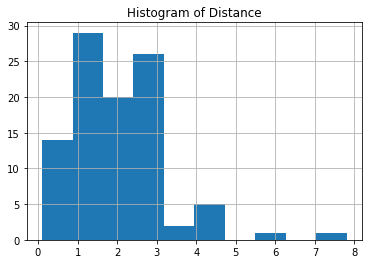

In [26]:
difference_dt["distance"].hist();
plt.title("Histogram of Distance");

<font color="blue"> This is the complete list of distance. </font>

In [27]:
difference_dt["distance"].sort_values()

(Francis, Vievee)                  0.104297
(Dungy, Camille T.)                0.236898
(Dove, Rita)                       0.484168
(Trethewey, Natasha)               0.510176
(Harris, Alysia Nicole)            0.514176
(Kocher, Ruth Ellen)               0.545099
(Moon, Kamilah Aisha)              0.546227
(Moss, Thylias)                    0.563104
(Woods, Jamila)                    0.577334
(Queen, Khadijah)                  0.605540
(Nichelle, Jae)                    0.662199
(Mans, Jasmine Nicole)             0.697114
(Stewart, Ebony)                   0.844357
(Evans, Mari)                      0.846126
(Kendrick, Dolores)                0.882627
(Sinclair, Safiya)                 0.938146
(Howard, Zora)                     0.942869
(Lewis, Robin Coste)               1.029974
(Giovanni, Nikki)                  1.041990
(Davis, Kai)                       1.064013
(Diggs, LaTasha N. Nevada)         1.064769
(Osbey, Brenda Marie)              1.066934
(Johnston, Amanda)              

## PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(difference_dt.iloc[:, :5])

PCA(n_components=5)

In [29]:
pca.explained_variance_ratio_

array([0.44371415, 0.18567208, 0.1611906 , 0.12038702, 0.08903615])

The following section is not in use. That's just some unfinished experiments.

## Explore How Different Factors Affect the Distance

In [30]:
factor_dt = data[['author_last_name', 'author_first_name', 'recording', "venue_type", 'slam_(1)_or_not_(0)?']]
factor_dt = factor_dt.drop_duplicates()
factor_dt.index = list(zip(factor_dt['author_last_name'], factor_dt['author_first_name']))
factor_dt = factor_dt.drop(['author_last_name', 'author_first_name'], axis=1)
factor_dt

,recording,venue_type,slam_(1)_or_not_(0)?
"(Adams, Samantha)",SR,self-recorded,0.0
"(Adisa, Opal Palmer)",L,Academic,0.0
"(Adisa, Opal Palmer)",L,self-recorded,0.0
"(Alexander, Elizabeth)",L,Academic,0.0
"(Angelou, Maya)",S,Studio,0.0
"(Angelou, Maya)",L,Academic,0.0
"(Barnes, Aziza)",L,Academic,0.0
"(Barnes, Aziza)",L,participatory setting,1.0
"(Betts, Tara)",L,Academic,0.0
"(Betts, Tara)",L,participatory setting,1.0


In [31]:
# Check missing values for "year_of_recording".
data.groupby(data.columns[:2].to_list())["year_of_recording"].apply(lambda x: sum(x.isna())).value_counts()

0    61
1    24
2    16
Name: year_of_recording, dtype: int64

In [32]:
# data.groupby(data.columns[:2].to_list())['slam_(1)_or_not_(0)?'].apply(lambda x: set(x)).value_counts()